<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li></ul></div>

# Защита персональных данных клиентов

В данном проекте нам нужно защитить данные клиентов страховой компании «Хоть потоп». Необходимо разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию и обосновать корректность его работы.

Нам нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось.

Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
Целевой признак: количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from numpy import linalg  as LA
from sklearn.linear_model import LinearRegression



In [2]:
data = pd.read_csv('/datasets/insurance.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
data['Возраст'] = data['Возраст'].astype('int')
data['Зарплата'] = data['Зарплата'].astype('int')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                5000 non-null   int64
 1   Возраст            5000 non-null   int64
 2   Зарплата           5000 non-null   int64
 3   Члены семьи        5000 non-null   int64
 4   Страховые выплаты  5000 non-null   int64
dtypes: int64(5)
memory usage: 195.4 KB


In [6]:
data.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [7]:
data.duplicated().sum()

153

In [8]:
data = data.drop_duplicates()

In [9]:
data.duplicated().sum()

0

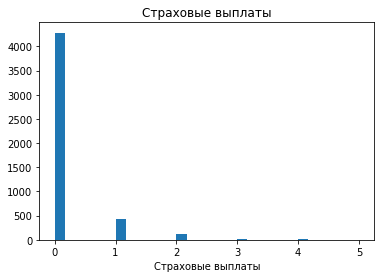

In [10]:

plt.hist(data['Страховые выплаты'], bins=30)
plt.title('Страховые выплаты')
plt.xlabel('Страховые выплаты')

plt.show()


В данном разделе мы загрузили и изучили данные. Проверили на дубликаты, и удалили имеющиеся. Привели все данные к типу "int". 
Изучили целевой признак (страховые выплаты). Судя по гистограмме страховых выплат очень мало.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ**: При умножении матрицы признаков на обратимую матрицу, качество линейной регресии не изменится.

**Обоснование:** ...
Предположим, что M обратима. Тогда
Ax=b подразумевает MAx=Mb подразумевает M−1MAx=M−1Mb подразумевает Ax=b. 
M является обратимым. Тогда
A x = b⟹ M A x = M b⟹M−1 M A x =M−1 M b⟹A x = b.

Взято  из https://math.stackexchange.com/questions/2340563/how-to-prove-that-multiplying-the-equation-ax-b-from-the-left-with-invertibl

## Алгоритм преобразования

**Алгоритм**
Наша задача проанализировать предложенный алгоритм преобразования данных и проверить наш предудыщий вывод - что качество линейной регрессии не поменяется. 
1. Генерируем произвольную обратимую матрицу
2. Параметры линейной регрессии обозначим в переменных (целевой признак, остальные признаки)
3. Обучим модель и найдем значенние R2 на модели.
4. Затем умножим обратную матрицу на матрицу признаков.
5. Обучим модель на новых данных  и найдем значение R2 на обученной модели
6. сравним результаты первоначальной и конечной метрик R2

**Обоснование**

Мы умножим наши признаки на произвольную обратимую матрицу и сравним результаты метрики R2 до умножения и после.

## Проверка алгоритма

In [11]:
features = data.drop('Страховые выплаты', axis=1).values
target = data['Страховые выплаты'].values

In [12]:
M_random =np.random.normal(size = (4,4)) 
M_random

array([[-0.90710989, -0.02469993, -1.39896245, -2.4888691 ],
       [-0.57726352, -1.26746927,  1.54120103,  0.43932215],
       [ 0.32929212, -1.71664571,  0.33126168,  0.25613489],
       [-0.9705901 ,  0.50780293,  0.14263768, -0.17154658]])

In [16]:
LA.inv(M_random)


array([[ 0.1056801 ,  0.42079736, -0.80058311, -1.65095454],
       [-0.02681062,  0.18818647, -0.83009611, -0.3684945 ],
       [ 0.17024572,  1.19730593, -1.27182439, -1.30270684],
       [-0.53573272, -0.82822503,  1.0149006 ,  1.3376103 ]])

In [14]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print('R2 на исходных признаках:',r2_score(target, predictions))

R2 на исходных признаках: 0.4302010046633359


In [15]:
M_new = features @ M_random
model.fit(M_new, target)
predictions = model.predict(M_new)
print('R2 на преобразованных признаках:',r2_score(target, predictions))

R2 на преобразованных признаках: 0.4302010046633271


# Вывод: 
Качество линейной регрессии не отличается до и после преобразования. Что и требовалось доказать.